In [1]:
!pip install scikit-learn Xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [7]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
svc = SVC(probability=True)

In [8]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SVC(probability=True)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
models = [lr, rf, xgb, svc]
for model in models:
    pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, pred):.4f}")

LogisticRegression Accuracy: 0.9737
RandomForestClassifier Accuracy: 0.9649
XGBClassifier Accuracy: 0.9561
SVC Accuracy: 0.9825


In [11]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('xgb', xgb), ('svc', svc)
], voting='soft')

voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9736842105263158


In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

stacking = StackingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('xgb', xgb)
], final_estimator=GaussianNB())

stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 0.956140350877193


In [13]:
import matplotlib.pyplot as plt

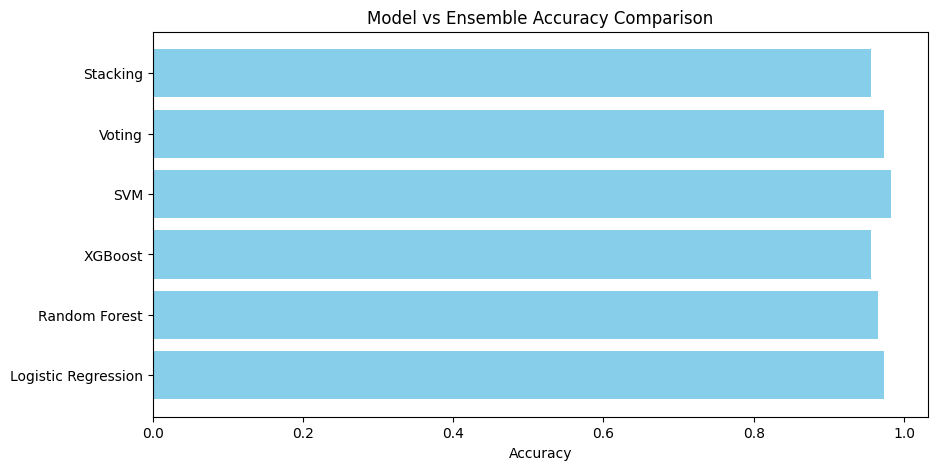

In [14]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Voting', 'Stacking']
accuracies = [
    accuracy_score(y_test, lr.predict(X_test)),
    accuracy_score(y_test, rf.predict(X_test)),
    accuracy_score(y_test, xgb.predict(X_test)),
    accuracy_score(y_test, svc.predict(X_test)),
    accuracy_score(y_test, voting_pred),
    accuracy_score(y_test, stack_pred)
]

plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model vs Ensemble Accuracy Comparison')
plt.show()